# Dowloading all necessary libraries

In [1]:
from collections import Counter
from numpy import mean, std

import copy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, classification_report, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')



# Reading the given dataset

In [2]:
import pandas as pd
import numpy as np
CreditRiskData=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",\
               sep=" ",header=None)
#Display first few rows in the data frame
CreditRiskData.head()
# Removing duplicate rows if any
CreditRiskData=CreditRiskData.drop_duplicates()
print('Shape After deleting duplicate values:', CreditRiskData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CreditRiskData.head(10)

Shape After deleting duplicate values: (1000, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [3]:
CreditRiskData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 171.9+ KB


## This function helps the above dataframe make more sense as it imputes the relevant data from the german.doc document

In [4]:
def substitute(df):
    headers=["checkingstatus","duration","history","purpose","amount","savings","employ","installment","status","others","residence","property","age","otherplans","housing","cards","job","liable","tele","foreign","Credit"]
    df.columns=headers
    # df.to_csv("german_data_credit_cat.csv",index=False) #save as csv file

    #for structuring only
    checkingstatus={'A14':"NA",'A11':"LITTLE", 'A12': "MODERATE",'A13':"RICH"}
    df["checkingstatus"]=df["checkingstatus"].map(checkingstatus)

    history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
    df["history"]=df["history"].map(history)

    purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
    df["purpose"]=df["purpose"].map(purpose)

    savings={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
    df["savings"]=df["savings"].map(savings)

    employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
    df["employ"]=df["employ"].map(employment)

    status={ 'A95':"female",'A94':"male",'A93':"male", 'A92':"female", 'A91':"male"}
    df["status"]=df["status"].map(status)

    others={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
    df["others"]=df["others"].map(others)

    property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
    df["property"]=df["property"].map(property)

    otherplans={'A143':"none", 'A142':"store", 'A141':"bank"}
    df["otherplans"]=df["otherplans"].map(otherplans)

    housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
    df["housing"]=df["housing"].map(housing)

    job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
    df["job"]=df["job"].map(job)

    tele={'A192':"yes", 'A191':"none"}
    df["tele"]=df["tele"].map(tele)

    foreign={'A201':"yes", 'A202':"no"}
    df["foreign"]=df["foreign"].map(foreign)

    Credit={1:"Good", 2:"Bad"}
    df["Credit"]=df["Credit"].map(Credit)
    return df


In [5]:
df= copy.deepcopy(CreditRiskData)
df= substitute(df)

In [6]:
df.nunique()

checkingstatus      4
duration           33
history             5
purpose            10
amount            921
savings             5
employ              5
installment         4
status              2
others              3
residence           4
property            4
age                53
otherplans          3
housing             3
cards               4
job                 4
liable              2
tele                2
foreign             2
Credit              2
dtype: int64

In [7]:
df.head(30)

,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,...,property,age,otherplans,housing,cards,job,liable,tele,foreign,Credit
0,LITTLE,6,critical account,radio/television,1169,no savings account,>=7 years,4,male,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good
1,MODERATE,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad
2,NA,12,critical account,education,2096,<100 DM,4<= <7 years,2,male,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good
3,LITTLE,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good
4,LITTLE,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad
5,NA,36,existing credits paid back duly till now,education,9055,no savings account,1<= < 4 years,2,male,none,...,unknown / no property,35,none,for free,1,unskilled - resident,2,yes,yes,Good
6,NA,24,existing credits paid back duly till now,furniture/equipment,2835,500 <= < 1000 DM,>=7 years,3,male,none,...,savings agreement/life insurance,53,none,own,1,skilled employee / official,1,none,yes,Good
7,MODERATE,36,existing credits paid back duly till now,car (used),6948,<100 DM,1<= < 4 years,2,male,none,...,car or other,35,none,rent,1,management/ highly qualified employee,1,yes,yes,Good
8,NA,12,existing credits paid back duly till now,radio/television,3059,>= 1000 DM,4<= <7 years,2,male,none,...,real estate,61,none,own,1,unskilled - resident,1,none,yes,Good
9,MODERATE,30,critical account,car (new),5234,<100 DM,unemployed,4,male,none,...,car or other,28,none,own,2,management/ highly qualified employee,1,none,yes,Bad


## Looking at the distribution of Target variable

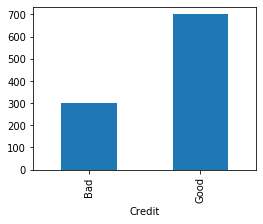

In [8]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=df.groupby('Credit').size()
GroupedData.plot(kind='bar', figsize=(4,3))

# Exploratory Data Analysis

In [9]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

## Visualize distribution of all the Categorical Predictor variables in the data using bar plots

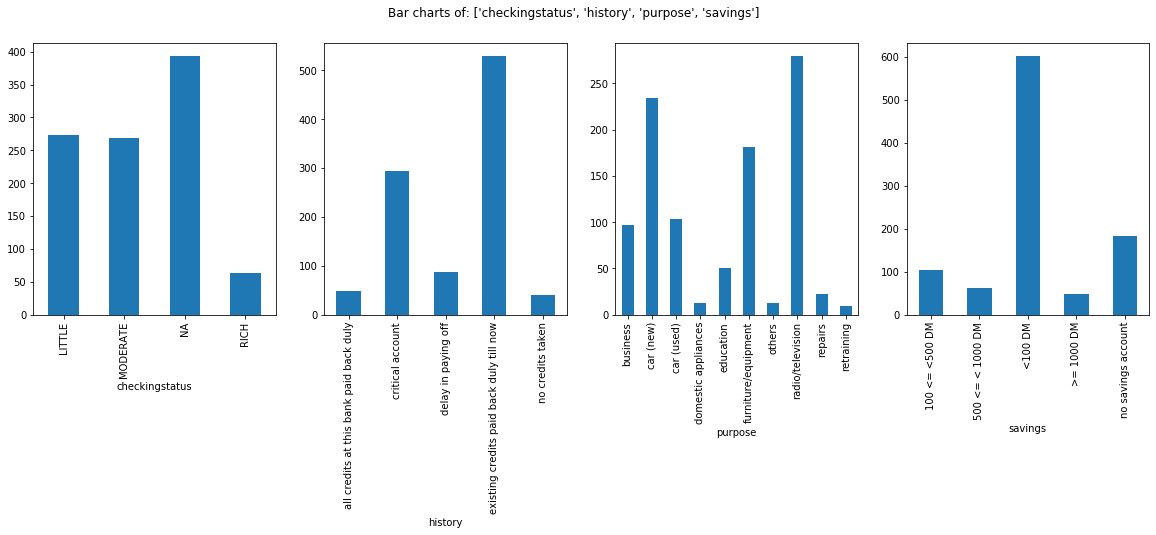

In [10]:
PlotBarCharts(inpData=df, 
              colsToPlot=['checkingstatus', 'history', 'purpose','savings'
                        ])

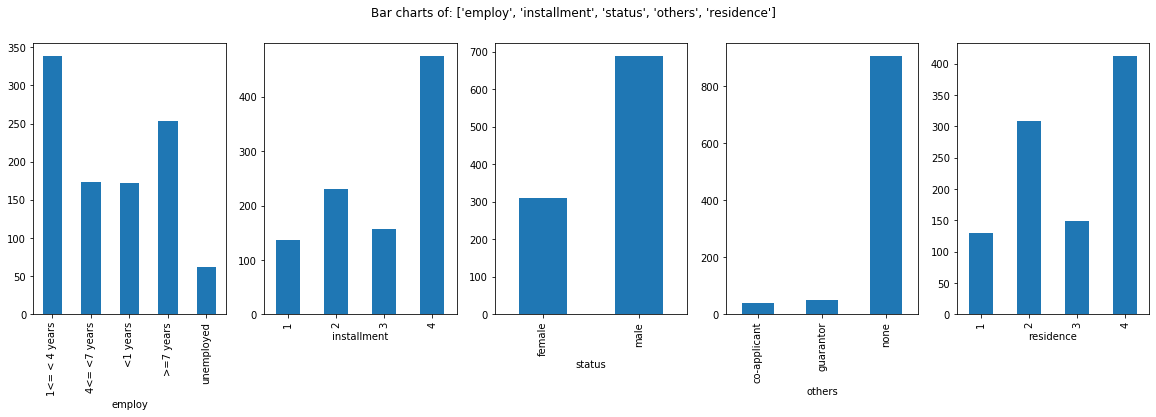

In [11]:
 PlotBarCharts(inpData=df, 
              colsToPlot=['employ','installment', 'status', 'others','residence'
                        ])
    
    


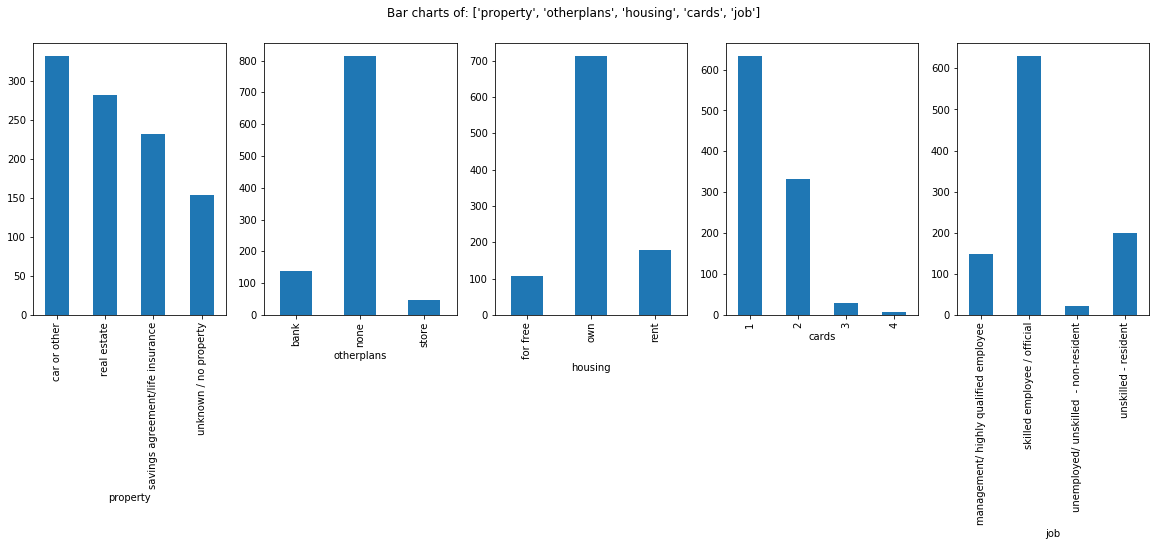

In [12]:
 PlotBarCharts(inpData=df, 
              colsToPlot=['property','otherplans', 'housing', 'cards', 'job'
                        ])
    



## Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A65FB9BC08>,
      dtype=object)

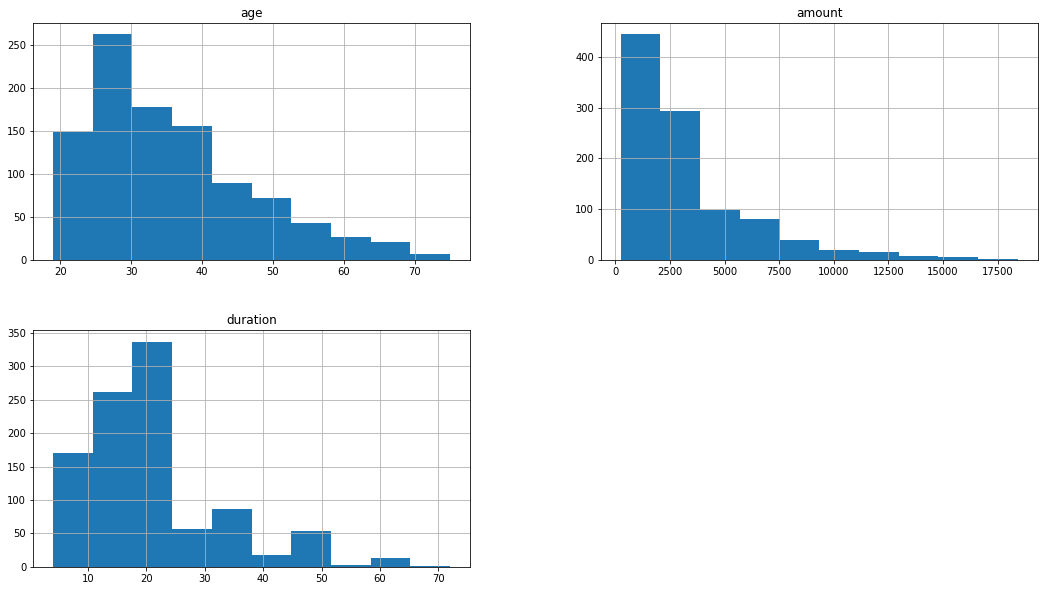

In [13]:
df.hist(['age', 'amount','duration'], figsize=(18,10))

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [14]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [15]:
ContinuousVariables=['age', 'amount','duration']
FunctionAnova(inpData=df, TargetVariable='Credit', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with Credit | P-Value: 0.003925339398278295
amount is correlated with Credit | P-Value: 8.797572373533373e-07
duration is correlated with Credit | P-Value: 6.488049877187189e-12


['age', 'amount', 'duration']

In [16]:
CrossTabResult=pd.crosstab(index=df['checkingstatus'], columns=df['Credit'])
CrossTabResult

Credit,Bad,Good
checkingstatus,,
LITTLE,135,139
MODERATE,105,164
NA,46,348
RICH,14,49


When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots

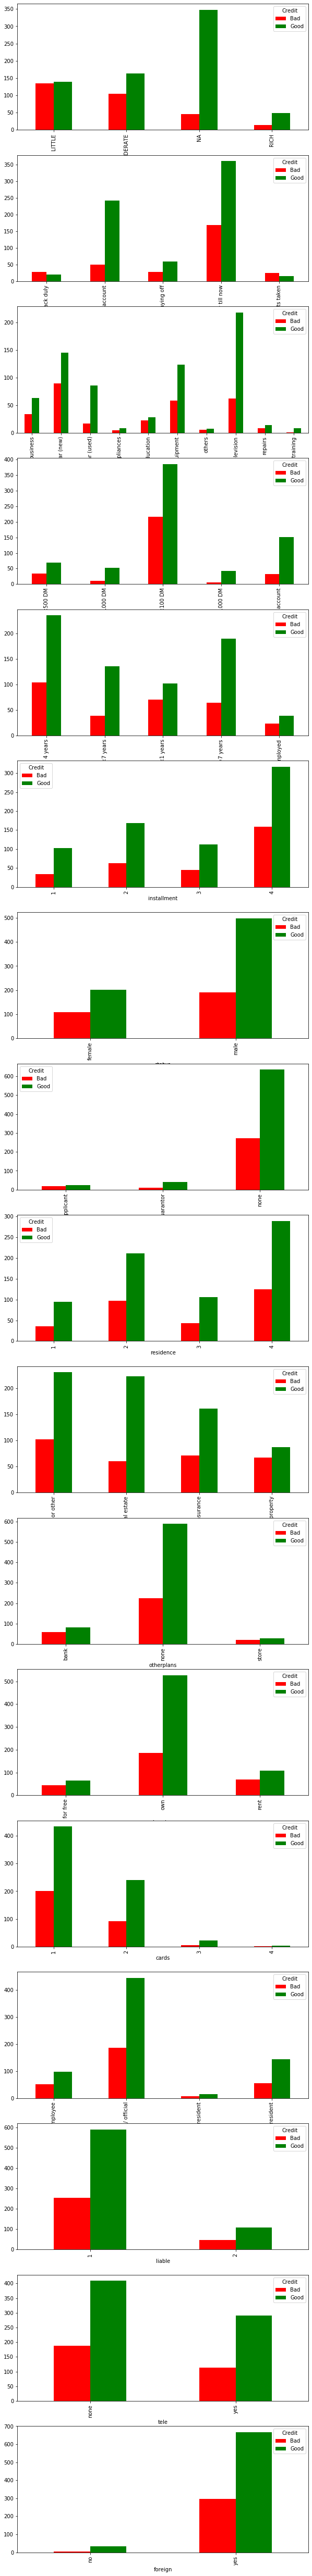

In [17]:
CategoricalColsList=['checkingstatus', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['Credit'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])

In [18]:
headers=["checkingstatus","duration","history","purpose","amount","savings","employ","installment","status","others","residence","property","age","otherplans","housing","cards","job","liable","tele","foreign","Credit"]
CreditRiskData.columns=headers
CreditRiskData.head(10)

,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,...,property,age,otherplans,housing,cards,job,liable,tele,foreign,Credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


Selecting final predictors for Machine Learning

## Selecting final predictors for Machine Learning

In [19]:
SelectedColumns=['checkingstatus','history','purpose','savings','employ',
 'status','others','property','otherplans','housing','foreign',
 'age', 'amount', 'duration']

# Selecting final columns
DataForML=CreditRiskData[SelectedColumns]
DataForML.head()

,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,amount,duration
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201,67,1169,6
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201,22,5951,48
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201,49,2096,12
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201,45,7882,42
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201,53,4870,24


In [20]:
DataForML.to_pickle('DataForML.pkl')

In [21]:
DataForML['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)

In [22]:
# Treating the binary nominal variable
DataForML['foreign'].replace({'A201':1, 'A202':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,amount,duration
0,A11,A34,A43,A65,5,A93,A101,A121,A143,A152,1,67,1169,6
1,A12,A32,A43,A61,3,A92,A101,A121,A143,A152,1,22,5951,48
2,A14,A34,A46,A61,4,A93,A101,A121,A143,A152,1,49,2096,12
3,A11,A32,A42,A61,4,A93,A103,A122,A143,A153,1,45,7882,42
4,A11,A33,A40,A61,3,A93,A101,A124,A143,A153,1,53,4870,24


In [23]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Credit']=CreditRiskData['Credit']

# Printing sample rows
DataForML_Numeric.head()

,employ,foreign,age,amount,duration,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A30,...,property_A122,property_A123,property_A124,otherplans_A141,otherplans_A142,otherplans_A143,housing_A151,housing_A152,housing_A153,Credit
0,5,1,67,1169,6,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,3,1,22,5951,48,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,2
2,4,1,49,2096,12,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3,4,1,45,7882,42,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
4,3,1,53,4870,24,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,2


In [24]:
# Printing all the column names for our reference
DataForML_Numeric.columns
DataForML_Numeric['Credit'].replace({1:'Bad', 2:'Good'}, inplace=True)

##  Splitting the data into Training and Testing sample

In [25]:
TargetVariable='Credit'
Predictors=['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Standardization/Normalization of data

In [26]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 46)
(700,)
(300, 46)
(300,)


## Support Vector Machines(SVM)

In [28]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

         Bad       0.78      0.89      0.83       209
        Good       0.61      0.42      0.50        91

    accuracy                           0.74       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.74      0.73       300

[[185  24]
 [ 53  38]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.76987902 0.69775382 0.73089802 0.76533333 0.77229833 0.76118421
 0.70133333 0.80197664 0.79002079 0.74604343]

Final Average Accuracy of the model: 0.75


## Choosing only the most important variables

In [29]:
# Separate Target Variable and Predictor Variables
TargetVariable='Credit'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['employ', 'age', 'amount', 'duration','checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49','savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1000, 32)
(1000,)


In [30]:
# Using the SVM algorithm with final hyperparamters
from sklearn import svm
clf = svm.SVC(C=4, kernel='rbf', gamma=0.1)

# Training the model on 100% Data available
Final_SVM_Model=clf.fit(X,y)

In [31]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Final_SVM_Model, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.795594   0.68       0.72238245 0.72867133 0.73089802 0.77407758
 0.66879756 0.80197664 0.73104474 0.74802495]

Final Average Accuracy of the model: 0.74


In [32]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('Final_SVM_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_SVM_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\hp\Hackathon


## Create a python function to predict output

In [33]:
# This Function can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputLoanDetails=InputLoanDetails.append(DataForML)
    
    # Treating the Ordinal variable first
    InputLoanDetails['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['employ', 'age', 'amount', 'duration','checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49','savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94']
    
    # Generating the input values to the model
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_SVM_Model.pkl', 'rb') as fileReadStream:
        model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)


In [34]:
# Calling the function for some loan applications manually
NewLoanApplications=pd.DataFrame(
    data=[['A73',22,5951,48,'A12','A32','A43','A61','A92'],
          ['A72',40,8951,24,'A12','A32','A43','A61','A92']],
    
    columns=['employ', 'age', 'amount', 'duration','checkingstatus', 
             'history', 'purpose', 'savings','status'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

  employ  age  amount  duration checkingstatus history purpose savings status
0    A73   22    5951        48            A12     A32     A43     A61    A92
1    A72   40    8951        24            A12     A32     A43     A61    A92


,Predicted Status
0,Good
1,Bad


In [35]:
# Creating the function which can take loan inputs and perform prediction
def FunctionLoanPrediction(inp_employ, inp_age , inp_amount, inp_duration,
                           inp_checkingstatus,inp_history, inp_purpose, 
                           inp_savings, inp_status):
    SampleInputData=pd.DataFrame(
     data=[[inp_employ, inp_age , inp_amount, inp_duration,
           inp_checkingstatus,inp_history, inp_purpose, inp_savings, inp_status]],
     columns=['employ', 'age', 'amount', 'duration','checkingstatus', 
         'history', 'purpose', 'savings','status'])

    # Calling the function defined above using the input parameters
    Predictions=PredictLoanStatus(InputLoanDetails= SampleInputData)

    # Returning the predicted loan status
    return(Predictions.to_json())

# Function call
FunctionLoanPrediction(inp_employ='A73', 
                       inp_age= 22, 
                       inp_amount=5951,
                       inp_duration=48,
                       inp_checkingstatus='A12',
                       inp_history='A32',
                       inp_purpose='A43',
                       inp_savings='A61',
                       inp_status='A92')

'{"Predicted Status":{"0":"Good"}}'

# Deploying a predictive model as an API

In [36]:
!pip install flask

In [37]:
from flask import Flask,request,jsonify
import pickle
import pandas as pd
import numpy

In [38]:
app = Flask(__name__)

@app.route('/LoanOfficer/get_loan_prediction', methods=["GET"])
def get_loan_prediction():
    try:
        # Getting the paramters from API call
        employ_value = request.args.get('employ')
        age_value = float(request.args.get('age'))
        amount_value=float(request.args.get('amount'))
        duration_value=float(request.args.get('duration'))
        checkingstatus_value=request.args.get('checkingstatus')
        history_value=request.args.get('history')
        purpose_value=request.args.get('purpose')
        savings_value=request.args.get('savings')
        status_value=request.args.get('PropertyArea')
                
        # Calling the funtion to get loan approval status
        prediction_from_api=FunctionLoanPrediction(
                       inp_employ=employ_value, 
                       inp_age= age_value, 
                       inp_amount=amount_value,
                       inp_duration=duration_value,
                       inp_checkingstatus=checkingstatus_value,
                       inp_history=history_value,
                       inp_purpose=purpose_value,
                       inp_savings=savings_value,
                       inp_status=status_value)

        return (prediction_from_api)
    
    except Exception as e:
        return('Error: Something is not right!'+str(e))

In [ ]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Dec/2021 20:08:48] "GET /LoanOfficer/get_loan_prediction?employ=A73&age=22&amount=9951&duration=48&checkingstatus=A12&history=A32&purpose=A43&savings=A61&status=A92 HTTP/1.1" 200 -


### Run the API using this link


http://127.0.0.1:8080/LoanOfficer/get_loan_prediction?employ=A73&age=22&amount=9951&duration=48&checkingstatus=A12&history=A32&purpose=A43&savings=A61&status=A92